# Tutorial 1.2 - Spatial analysis with Python

```{attention}
Finnish university students are encouraged to use the CSC Notebooks platform.<br/>
<a href="https://notebooks.csc.fi/"><img alt="CSC badge" src="https://img.shields.io/badge/launch-CSC%20notebook-blue.svg" style="vertical-align:text-bottom"></a>

Others can follow the lesson interactively using Binder. Check the rocket icon on the top of this page.
```

In the first week, we will take a quick tour to Python's (spatial) data science ecosystem and see how we can use some of the fundamental open source Python packages, such as:

 - pandas / geopandas
 - shapely
 - pysal
 - pyproj
 - osmnx / pyrosm
 - matplotlib (visualization)
 
As you can see, we won't use any GIS software for doing the programming (such as ArcGIS/arcpy or QGIS), but focus on learning the open source packages that are independent from any specific software. These libraries form nowadays not only the core for modern spatial data science, but they are also fundamental parts of commercial applications used and developed by many companies around the world. 

```{note} 

If you have experience working with the Python's spatial data science stack, this tutorial probably does not bring much new to you, but to get everyone on the same page, we will all go through this introductory tutorial.

```

**Contents:**

 - Reading / writing spatial data
 - Retrieving OpenStreetMap data
 - Reprojections
 - Spatial join
 - Plotting data with matplotlib

## Fundamental library: Geopandas

In this course, the most often used Python package that you will learn is [geopandas](https://geopandas.org/). Geopandas makes it possible to work with geospatial data in Python in a relatively easy way. Geopandas combines the capabilities of the data analysis library [pandas](https://pandas.pydata.org/pandas-docs/stable/) with other packages like [shapely](https://shapely.readthedocs.io/en/stable/manual.html) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html) for managing spatial data. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. In case you wish to have additional help getting started with pandas, we recommend you to take a look lessons 5 and 6 from the openly available [Geo-Python -course](geo-python.github.io). The main difference between GeoDataFrames and pandas DataFrames is that a [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe) should contain (at least) one column for geometries. By default, the name of this column is `'geometry'`. The geometry column is a [GeoSeries](http://geopandas.org/data_structures.html#geoseries) which contains the geometries (points, lines, polygons, multipolygons etc.) as shapely objects. 

![geodataframe.png](img/geodataframe.png)


## Reading and writing spatial data

Next we will learn some of the basic functionalities of geopandas. We have a couple of GeoJSON files stored in the `data` folder that we will use.

We can read the data easily with `read_file()` -function:

In [1]:
import geopandas as gpd

# Filepath
fp = "data/buildings.geojson"

# Read the file
data = gpd.read_file(fp)

# How does it look?
data.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,...,start_date,wikipedia,id,timestamp,version,tags,osm_type,internet_access,changeset,geometry
0,Helsinki,None,29,None,00170,Unioninkatu,None,None,None,None,...,None,None,4253124,1542041335,4,None,way,None,NaN,"POLYGON ((24.95121 60.16999, 24.95122 60.16988..."
1,Helsinki,None,2,None,00100,Kaivokatu,ainfo@ateneum.fi,Ateneum,"Tu, Fr 10:00-18:00; We-Th 10:00-20:00; Sa-Su 1...",None,...,1887,fi:Ateneumin taidemuseo,8033120,1544822447,27,"{'architect': 'Theodor Höijer', 'contact:websi...",way,None,NaN,"POLYGON ((24.94477 60.16982, 24.94450 60.16981..."
2,Helsinki,FI,22-24,None,None,Mannerheimintie,None,Lasipalatsi,None,None,...,1936,fi:Lasipalatsi,8035238,1533831167,23,"{'name:fi': 'Lasipalatsi', 'name:sv': 'Glaspal...",way,None,NaN,"POLYGON ((24.93561 60.17045, 24.93555 60.17054..."
3,Helsinki,None,2,None,00100,Mannerheiminaukio,None,Kiasma,Tu 10:00-17:00; We-Fr 10:00-20:30; Sa 10:00-18...,None,...,1998,fi:Kiasma (rakennus),8042215,1553963033,30,"{'name:en': 'Museum of Modern Art Kiasma', 'na...",way,None,NaN,"POLYGON ((24.93682 60.17152, 24.93662 60.17150..."
4,None,FI,None,None,None,None,None,None,None,None,...,None,None,15243643,1546289715,7,None,way,None,NaN,"POLYGON ((24.93675 60.16779, 24.93660 60.16789..."


As we can see, the GeoDataFrame contains various attributes in separate columns. The `geometry` column contains the spatial information. We can take a look of some of the basic information about our GeoDataFrame with command:

In [2]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   addr:city           86 non-null     object  
 1   addr:country        57 non-null     object  
 2   addr:housenumber    88 non-null     object  
 3   addr:housename      4 non-null      object  
 4   addr:postcode       54 non-null     object  
 5   addr:street         89 non-null     object  
 6   email               2 non-null      object  
 7   name                81 non-null     object  
 8   opening_hours       8 non-null      object  
 9   operator            7 non-null      object  
 10  phone               8 non-null      object  
 11  ref                 1 non-null      object  
 12  url                 8 non-null      object  
 13  website             20 non-null     object  
 14  building            486 non-null    object  
 15  amenity             26 non-null 

From here, we can see that our data is indeed a GeoDataFrame object with 486 entries and 34 columns. You can also get descriptive statistics of your data by calling:

In [3]:
data.describe()

,id,timestamp,version,changeset
count,4.860000e+02,4.860000e+02,486.000000,66.0
mean,1.400780e+08,1.455829e+09,4.849794,0.0
std,1.633527e+08,9.247528e+07,4.561162,0.0
min,8.253000e+03,1.197929e+09,1.000000,0.0
25%,2.294267e+07,1.374229e+09,2.000000,0.0
50%,1.228699e+08,1.493288e+09,3.000000,0.0
75%,1.359805e+08,1.530222e+09,7.000000,0.0
max,1.042029e+09,1.555840e+09,31.000000,0.0


In this case, we didn't have many columns with numerical data, but typically you have numeric values in your dataset and this is a good way to get a quick view how the data look like.

Naturally, as the data is **spatial**, we want to visualize it to understand the nature of the data better. We can do this easily with `plot()` method:

<AxesSubplot: >

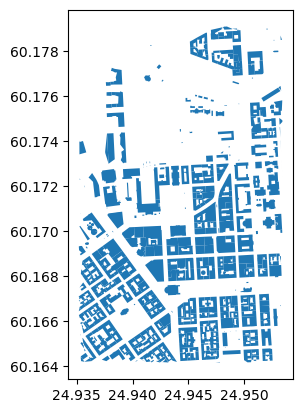

In [4]:
data.plot()

Now we can see that the data indeed represents buildings (in central Helsinki). 

We can also very easily make an interactive map out of this same data by using `.explore()` function:

In [30]:
data.explore()

Naturally we can also write this data to disk. Geopandas supports writing data to various data formats as well as to PostGIS which is the most widely used open source database for GIS. Let's write the data as a Shapefile to the same `data` directory from where we read the data. When writing data to local disk you can use `to_file()` method that exports the data in Shapefile format by default:

In [5]:
# Output filepath
outfp = "data/buildings_copy.shp"
data.to_file(outfp)

/tmp/ipykernel_24597/403506898.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  data.to_file(outfp)


## Retrieving data from OpenStreetMap

Now we have seen how to read spatial data from disk. OpenStreetMap (OSM) is probably the most well known and widely used spatial dataset/database in the world. Also in this course, we will use OSM data frequently. Hence, let's see how we can retrieve data from OSM using a library called [pyrosm](https://pyrosm.readthedocs.io/en/latest/). With `pyrosm` you can easily download and extract data from anywhere in the world based on OSM.PBF files that are distributed e.g. by [Geofabrik](http://download.geofabrik.de/). The tool aims to be an efficient way to parse OSM data covering large geographical areas (such as countries and cities), but as a downside, it is a bit limited in a sense how you can define your area of interest. With `pyrosm` you can extract OSM data from 654 regions in the world (covering all countries plus many city regions, see [docs for further info](https://pyrosm.readthedocs.io/en/latest/basics.html#available-datasets)).

```{note} 

In case you want to extract OSM data from smaller areas, e.g. using a buffer of 2 km around a specific location, we recommend using [OSMnx](https://github.com/gboeing/osmnx) library, which is more flexible in terms of specifying the area of interest. 

```

Let's see how we can download and extract OSM data for Helsinki Region using `pyrosm`:

In [6]:
from pyrosm import OSM, get_data

# Download data for Helsinki
fp = get_data("helsinki")

# Initialize the reader object for Helsinki
osm = OSM(fp)

Downloaded Protobuf data 'Helsinki.osm.pbf' (32.95 MB) to:
'/tmp/pyrosm/Helsinki.osm.pbf'


As a first step, we downloaded the data for "Helsinki" using the `get_data` function, which is a helper function that automates the data downloading process and stores the data locally in a temporary folder (inside `/tmp/` in this case). The next step that we did, was to initialize a reader object called `OSM`. The `OSM` takes the filepath to a given `osm.pbf` file as an input. Notice that at this point we didn't yet read any data into GeoDataFrame.

OSM is a "database of the world", hence it contains **a lot** of information about different things. With `pyrosm` you can easily extract information about:

- street networks --> `osm.get_network()`
- buildings --> `osm.get_buildings()`
- Points of Interest (POI) --> `osm.get_pois()`
- landuse --> `osm.get_landuse()`
- natural elements --> `osm.get_natural()`
- boundaries --> `osm.get_boundaries()`

Let's see how we can read all the buildings from Helsinki Region:

In [7]:
buildings = osm.get_buildings()

In [8]:
buildings.head()

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,Espoo,FI,None,2,None,02150,None,Konemiehentie,None,Aalto Tietotekniikka,...,None,1998,None,4217650,0,-1,"{""alt_name"":""T-talo"",""loc_name"":""Tikkitalo"",""n...",way,"POLYGON ((24.82129 60.18718, 24.82164 60.18712...",NaN
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,4217760,0,-1,"{""access"":""private"",""parking"":""multi-storey"",""...",way,"POLYGON ((24.83776 60.18905, 24.83796 60.18938...",NaN
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,4220761,0,-1,None,way,"POLYGON ((24.85599 60.20719, 24.85590 60.20719...",NaN
3,Helsinki,FI,None,5,Uimastadion,00250,None,Hammarskjöldintie,None,Uimastadion,...,None,None,None,4252923,0,-1,"{""leisure"":""stadium"",""name:en"":""Swimming Stadi...",way,"POLYGON ((24.93076 60.18914, 24.93067 60.18898...",NaN
4,Espoo,None,None,9,None,02150,None,Otaniementie,None,Aalto-yliopisto Harald Herlin -oppimiskeskus,...,Bing,None,None,4252948,0,-1,"{""name:en"":""Aalto University Harald Herlin Lea...",way,"POLYGON ((24.82740 60.18514, 24.82806 60.18480...",NaN


Let's check how many buildings did we get:

In [9]:
len(buildings)

159411

Okay, so there are more than 150 thousand buildings in the Helsinki Region. Naturally, we would like to see them on a map. Let's plot our data using `plot()` (might take some time as there are many objects to plot):

<AxesSubplot: >

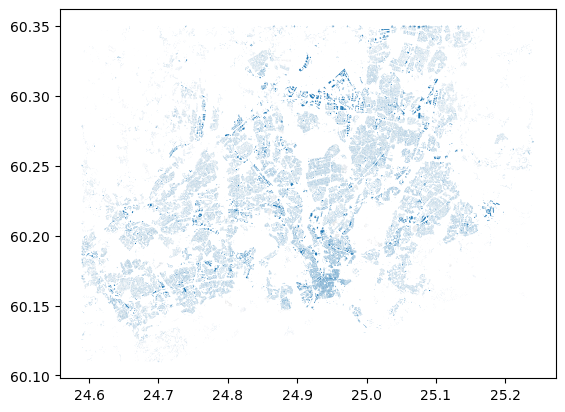

In [10]:
buildings.plot()

Great! As a result we got a map that seems to look correct. 

## Reprojecting data

As we can see from the previous maps that we have produced, the coordinates on the x and y axis hint that our geometries are represented in decimal degrees (WGS84). 
In many cases, you want to reproject your data to another CRS. Luckily, doing that is easy with `geopandas`. Let's first take a look what the Coordinate Reference System (CRS) of our GeoDataFrame is. We can access the CRS information of the GeoDataFrame by accessing an attribute called `crs`:

In [11]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As a result, we get information about the CRS, and we can see that the data is indeed in WGS84. We can also see that the EPSG code for the CRS is 4326.
We can easily reproject our data by using a method `to_crs()`. The easiest way to use the method is to specify the destination CRS as an EPSG code. Let's reproject our data into EPSG 3067 which is the most widely used projected coordinate reference system used in Finland, EUREF-FIN: 

In [12]:
projected = buildings.to_crs(epsg=3067)
projected.crs

<Derived Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As we can see, now we have an `Projected CRS` as a result. To confirm the difference, let's take a look at the geometry of the first row in our original `buildings` GeoDataFrame and the `projected` GeoDataFrame. To select a specific row in data, we can use the `loc` indexing:

In [13]:
orig_geom = buildings.loc[0, "geometry"]
projected_geom = projected.loc[0, "geometry"]

print("Orig:\n", orig_geom, "\n")
print("Proj:\n", projected_geom)

Orig:
 POLYGON ((24.8212885 60.1871792, 24.8216351 60.1871237, 24.8218626 60.1870873, 24.8218641 60.1870934, 24.8218654 60.1870987, 24.8219228 60.1870952, 24.8219186 60.1870783, 24.8219949 60.1870661, 24.8225411 60.1869791, 24.8224862 60.186896, 24.8224626 60.1868996, 24.8224423 60.1869026, 24.8223976 60.1867789, 24.8221329 60.1867998, 24.8221083 60.1867761, 24.8220836 60.1867524, 24.822336 60.186716, 24.8223039 60.186662, 24.8223248 60.1866583, 24.8223455 60.1866546, 24.8222782 60.1865828, 24.8222717 60.1865839, 24.8217847 60.1866948, 24.821782 60.1866868, 24.821718 60.1866924, 24.821721 60.1867002, 24.8217239 60.1867078, 24.8211387 60.1867604, 24.8211339 60.1867474, 24.8210732 60.1867528, 24.8210758 60.18676, 24.8210779 60.1867659, 24.8204964 60.1868181, 24.8204917 60.186805, 24.8204286 60.1868107, 24.8204316 60.1868189, 24.8204333 60.1868238, 24.8203009 60.1868357, 24.8203177 60.1868814, 24.8203355 60.18688, 24.820371 60.1869699, 24.8204695 60.186961, 24.8204728 60.18697, 24.8204764

As we can see the coordinates that form our Polygon has changed from decimal degrees to **meters**. Let's see what happens if we just call the geometries:

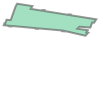

In [14]:
orig_geom

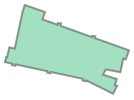

In [15]:
projected_geom

As you can see, we can draw the geometry directly in the screen, and we can easily see the difference in the shape of the two geometries. The `orig_geom` and `projected_geom` variables contain a Shapely geometry which is `Polygon` in this case. We can confirm this by checking the type:

In [16]:
type(orig_geom)

shapely.geometry.polygon.Polygon

These shapely geometries are used as the underlying data structure in most GIS packages in Python to present geometrical information. Shapely is fundamentally a Python wrapper for [GEOS](https://trac.osgeo.org/geos/) which is widely used library (written in C++) under the hood of many GIS softwares such as QGIS, GDAL, GRASS, PostGIS, Google Earth etc. Currently, there is [ongoing work](https://pygeos.readthedocs.io/en/latest/) to vectorize all the GEOS functionalities for Python and bring those eventually into Shapely which will greatly boost the performance of all geometry related operations in Python ecosystem (approaching the same efficiency as PostGIS). Some of these improvements can already be found under the hood of latest version of geopandas.

## Calculating area

One thing that is quite often interesting to know when working with spatial data, is the `area` of the geometries. In geopandas, we can easily calculate e.g. the area for each of our buildings by: 

In [17]:
projected["building_area"] = projected.area
projected["building_area"].describe()

count    159411.000000
mean        288.614445
std         939.708068
min           0.000000
25%          67.919331
50%         142.707799
75%         261.594790
max       84158.162750
Name: building_area, dtype: float64

We calculated the area by calling `area` which is the attribute containing information about areas of the buildings measured based on the map units of the data. Hence, in this case because our data is projected in Euref-FIN the units that we stored in `"building_area"` column are **square meters**. It's important to always keep in mind the CRS when calculating areas, distances etc. with geometries.  

## Spatial join

A commonly needed GIS functionality, is to be able to merge information between two layers using location as the `key`. Hence, it is somewhat similar approach as *table join* but because the operation is based on geometries, it is called *spatial join*. 
Next, we will see how we can conduct a spatial join and merge information between two layers. We will read all restaurants from the OSM for Helsinki Region, and combine information from restaurants to the underlying building (*restaurants typically are within buildings*). We will again use `pyrosm` for reading the data, but this time we will use `get_pois()` function:

/home/hentenka/.conda/envs/mamba/envs/sp-test/lib/python3.9/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


<AxesSubplot: >

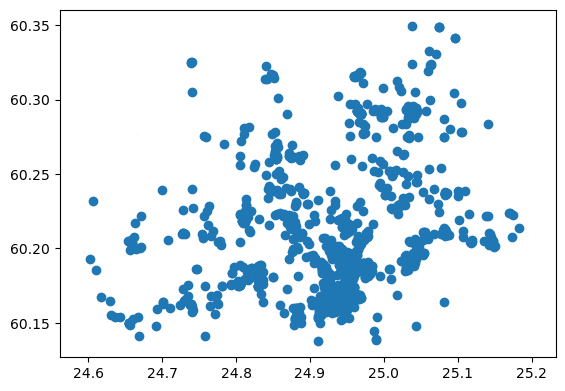

In [18]:
# Read Points of Interest using the same OSM reader object that was initialized earlier
restaurants = osm.get_pois(custom_filter={"amenity": ["restaurant"]})
restaurants.plot()

In [19]:
restaurants.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   version           1573 non-null   int8    
 1   changeset         1491 non-null   float64 
 2   timestamp         1573 non-null   int64   
 3   id                1573 non-null   int64   
 4   lat               1488 non-null   float32 
 5   tags              1521 non-null   object  
 6   lon               1488 non-null   float32 
 7   addr:city         1041 non-null   object  
 8   addr:country      380 non-null    object  
 9   addr:housenumber  1135 non-null   object  
 10  addr:housename    123 non-null    object  
 11  addr:postcode     1005 non-null   object  
 12  addr:place        1 non-null      object  
 13  addr:street       1169 non-null   object  
 14  email             209 non-null    object  
 15  name              1551 non-null   object  
 16  opening_hours   

As we can see, the OSM for Helsinki Region contains 1388 restaurants altogether. As you can probably guess, the OSM data is far from "perfect" in terms of the quality of the restaurant listings. This is due to the voluntary nature of adding information to the OpenStreetMap, and the fact restaurants (as well as other POI features) are highly dynamic by nature, i.e. new amenities open and close all the time, and it is challenging to keep up to date with those changes (this is a challenge even for commercial companies).  

Joining data from buildings to the restaurants can be done easily using `sjoin()` function from geopandas:

In [20]:
# Join information from buildings to restaurants
join = gpd.sjoin(restaurants, buildings)

# Print column names
print(join.columns)

# Show rows
join

Index(['version_left', 'changeset_left', 'timestamp_left', 'id_left', 'lat',
       'tags_left', 'lon', 'addr:city_left', 'addr:country_left',
       'addr:housenumber_left', 'addr:housename_left', 'addr:postcode_left',
       'addr:place_left', 'addr:street_left', 'email_left', 'name_left',
       'opening_hours_left', 'operator_left', 'phone_left', 'ref_left',
       'url_left', 'website_left', 'amenity_left', 'bar', 'cafe',
       'drinking_water', 'internet_access_left', 'office_left', 'pub',
       'restaurant', 'source_left', 'start_date_left', 'wikipedia_left',
       'geometry', 'osm_type_left', 'building_left', 'building:levels_left',
       'index_right', 'addr:city_right', 'addr:country_right', 'addr:full',
       'addr:housenumber_right', 'addr:housename_right', 'addr:postcode_right',
       'addr:place_right', 'addr:street_right', 'email_right', 'name_right',
       'opening_hours_right', 'operator_right', 'phone_right', 'ref_right',
       'url_right', 'website_right', 'b

,version_left,changeset_left,timestamp_left,id_left,lat,tags_left,lon,addr:city_left,addr:country_left,addr:housenumber_left,...,shop,source_right,start_date_right,wikipedia_right,id_right,timestamp_right,version_right,tags_right,osm_type_right,changeset_right
0,0,0.0,0,25279508,60.208969,"{""contact:website"":""http://www.pikkuranska.com...",24.866842,None,None,None,...,None,None,1957,None,28175497,0,-1,"{""architect"":""Eliel Muoniovaara"",""source:archi...",way,NaN
1,0,0.0,0,27392509,60.181183,"{""diet:kosher"":""no"",""diet:vegan"":""yes"",""diet:v...",24.883369,None,None,None,...,None,None,None,None,26405360,0,-1,"{""nohousenumber"":""yes"",""wikidata"":""Q98432560""}",way,NaN
2,0,0.0,0,50808951,60.204544,"{""cuisine"":""scandinavian"",""outdoor_seating"":""y...",25.034805,None,None,None,...,None,None,None,None,15504425,0,-1,None,way,NaN
3,0,0.0,0,50812719,60.206631,"{""cuisine"":""nepalese"",""diet:halal"":""no"",""diet:...",25.042566,Helsinki,FI,4,...,None,None,None,None,15505662,0,-1,None,way,NaN
4,0,0.0,0,50818866,60.195324,"{""diet:halal"":""no"",""diet:kosher"":""no"",""wheelch...",25.030569,Helsinki,None,14,...,None,None,1991,None,10637173,0,-1,"{""building:maintenance:operator"":""Lassila&Tika...",way,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,-1,NaN,0,1079281913,NaN,"{""delivery"":""yes"",""indoor"":""room"",""indoor_seat...",NaN,Helsinki,None,4,...,mall,None,2018-11-22,None,569024417,0,-1,"{""changing_table"":""yes"",""max_level"":""1"",""min_l...",way,NaN
1566,-1,NaN,0,1079281935,NaN,"{""indoor"":""room"",""level"":""0""}",NaN,Helsinki,None,4,...,mall,None,2018-11-22,None,569024417,0,-1,"{""changing_table"":""yes"",""max_level"":""1"",""min_l...",way,NaN
1567,-1,NaN,0,1079281940,NaN,"{""delivery"":""yes"",""indoor"":""room"",""level"":""0"",...",NaN,Helsinki,None,4,...,mall,None,2018-11-22,None,569024417,0,-1,"{""changing_table"":""yes"",""max_level"":""1"",""min_l...",way,NaN
1568,-1,NaN,0,1079281941,NaN,"{""branch"":""Laajasalo"",""cuisine"":""middle_easter...",NaN,Helsinki,None,4,...,mall,None,2018-11-22,None,569024417,0,-1,"{""changing_table"":""yes"",""max_level"":""1"",""min_l...",way,NaN


<AxesSubplot: >

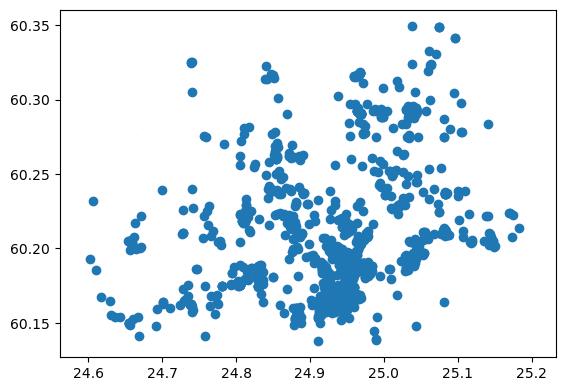

In [21]:
# Visualize the data as well
join.plot()

As we can see from the above, now we have merged information from the buildings to restaurants. The geometries of the `left` GeoDataFrame, i.e. restaurants were kept by default as the geometries.

### Selecting data using sjoin

One handy trick and efficient trick for spatial join is to use it for **selecting data**. We can e.g. select all buildings that intersect with restaurants by conducting the spatial join other way around, i.e. using the buildings as the left GeoDataFrame and the restaurants as the right GeoDataFrame:

/home/hentenka/.conda/envs/mamba/envs/sp-test/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot: >

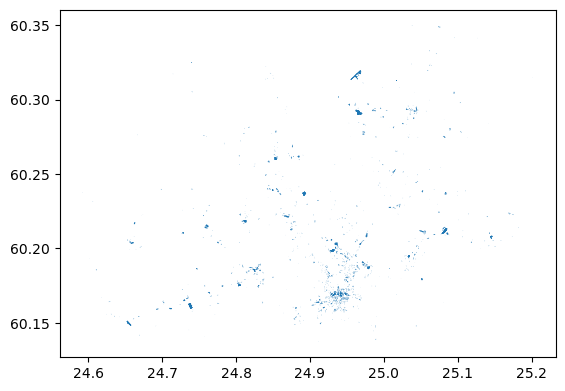

In [22]:
# Merge information from restaurants to buildings (conducts selection at the same time)
join2 = gpd.sjoin(buildings, restaurants, how="inner", op="intersects")
join2.plot()

As we can see (although the small building geometries are a bit poorly visible), the end result is a layer of buildings which intersected with the restaurants. This is a straightforward way to conduct simple spatial queries. You can specify with `op` parameter whether the binary predicate between the layers (i.e. the spatial relation between geometries) should be:

- `intersects`
- `contains`
- `within`

## Plotting data with matplotlib

Thus far, we haven't really made any effort to make our maps visually appealing. Let's next see how we can adjust the appearance of our map, and how we can visualize many layers on top of each other. Let's start by visualizing the buildings that we selected earlier and adjust a bit of the colors and figuresize. We can adjust the color of polygons with `facecolor` parameter and the figure size with `figsize` parameter that accepts a tuple of width and height as an argument:

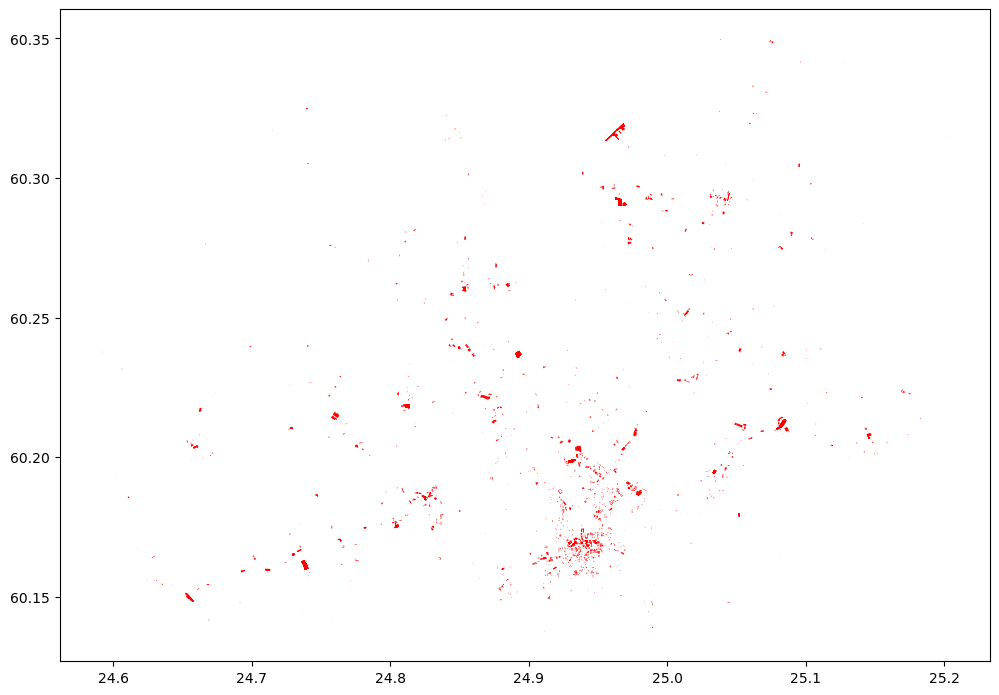

In [23]:
ax = join2.plot(facecolor="red", figsize=(12,12))

In [24]:
join2.columns

Index(['addr:city_left', 'addr:country_left', 'addr:full',
       'addr:housenumber_left', 'addr:housename_left', 'addr:postcode_left',
       'addr:place_left', 'addr:street_left', 'email_left', 'name_left',
       'opening_hours_left', 'operator_left', 'phone_left', 'ref_left',
       'url_left', 'website_left', 'building_left', 'amenity_left',
       'building:flats', 'building:levels_left', 'building:material',
       'building:min_level', 'building:use', 'craft', 'height',
       'internet_access_left', 'landuse', 'levels', 'office_left', 'shop',
       'source_left', 'start_date_left', 'wikipedia_left', 'id_left',
       'timestamp_left', 'version_left', 'tags_left', 'osm_type_left',
       'geometry', 'changeset_left', 'index_right', 'version_right',
       'changeset_right', 'timestamp_right', 'id_right', 'lat', 'tags_right',
       'lon', 'addr:city_right', 'addr:country_right',
       'addr:housenumber_right', 'addr:housename_right', 'addr:postcode_right',
       'addr:place_

Now with the bigger figure size, it is already a bit easier to see the selected buildings that have a restaurant inside them (according OSM). Let's color our buildings based on the building type. Hence, each building type category will receive a different color:  

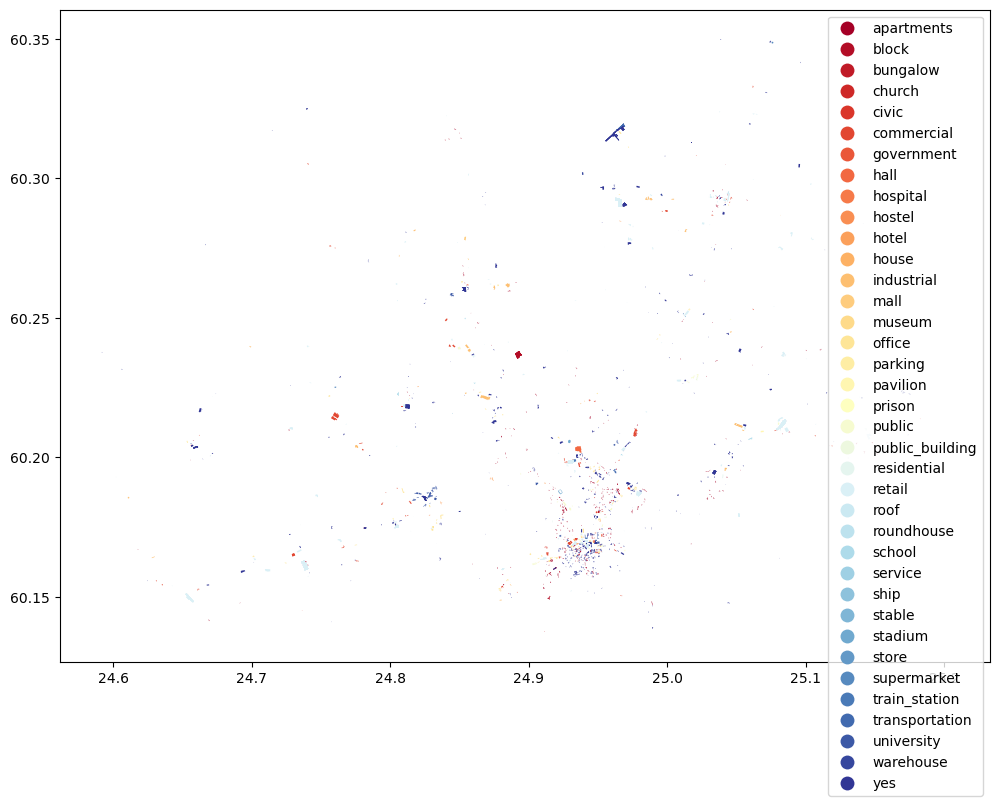

In [25]:
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

Now we used the parameter `column` to specify the attribute that is used to specify the color for each building (can be categorical or continuous). We used `cmap` to specify the colormap for the categories and we added the legend by specifying `legend=True`. It is still a bit tricky to see what happens in our map. Luckily it is easy to **zoom in** to our map by using a specific commands (`set_xlim()` and `set_ylim()` that control the *axis* of our visualization:

(60.15, 60.18)

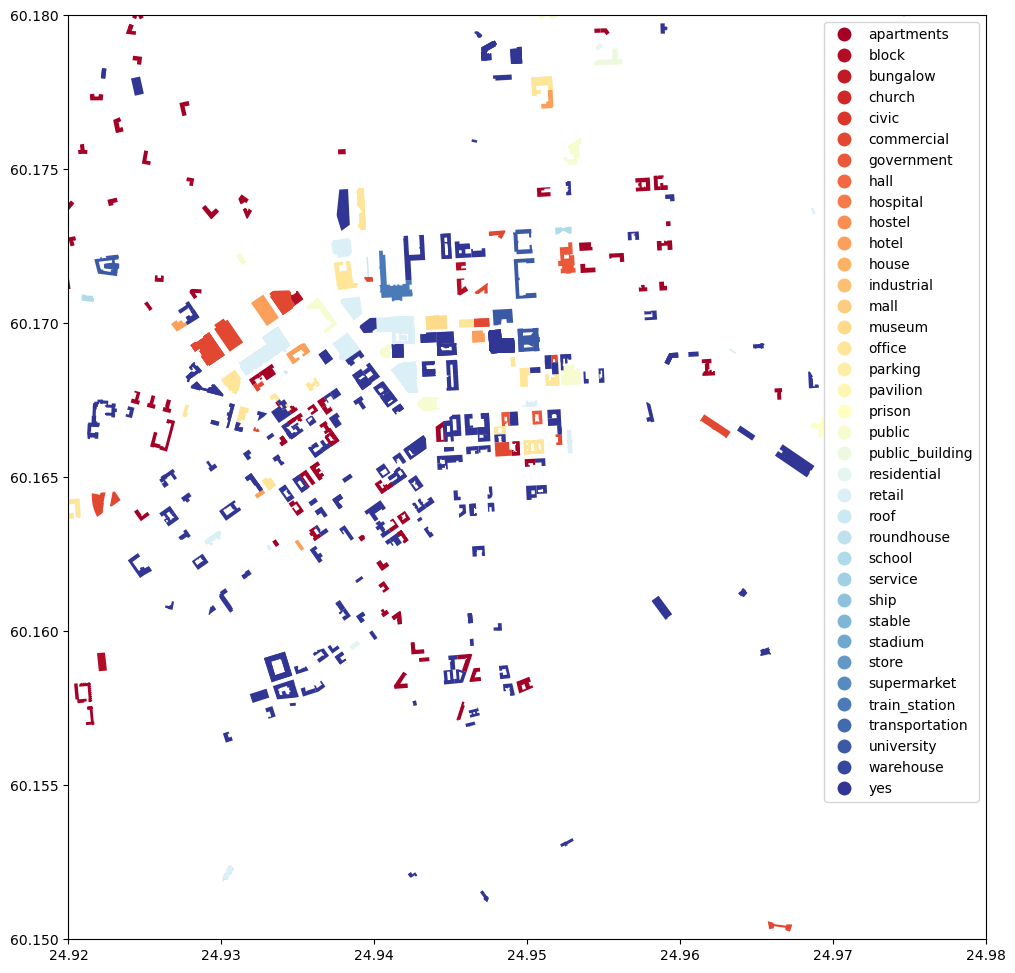

In [26]:
# Zoom into city center by specifying X and Y coordinate extent
# These values should be given in the units that our data is presented (here decimal degrees)
xmin, xmax = 24.92, 24.98
ymin, ymax = 60.15, 60.18

# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Control and set the x and y limits for the axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

Now it is much easier to see how the building types are distributed in the city. To get a bit more context to our visualizaton. Let's also add roads with our buildings. 
To do that we first need to extract the roads from OSM:

In [27]:
# Get roads (retrieves walkable roads by default)
roads = osm.get_network()

Now we can continue and add the roads as a layer to our visualization with gray line color:

(60.15, 60.18)

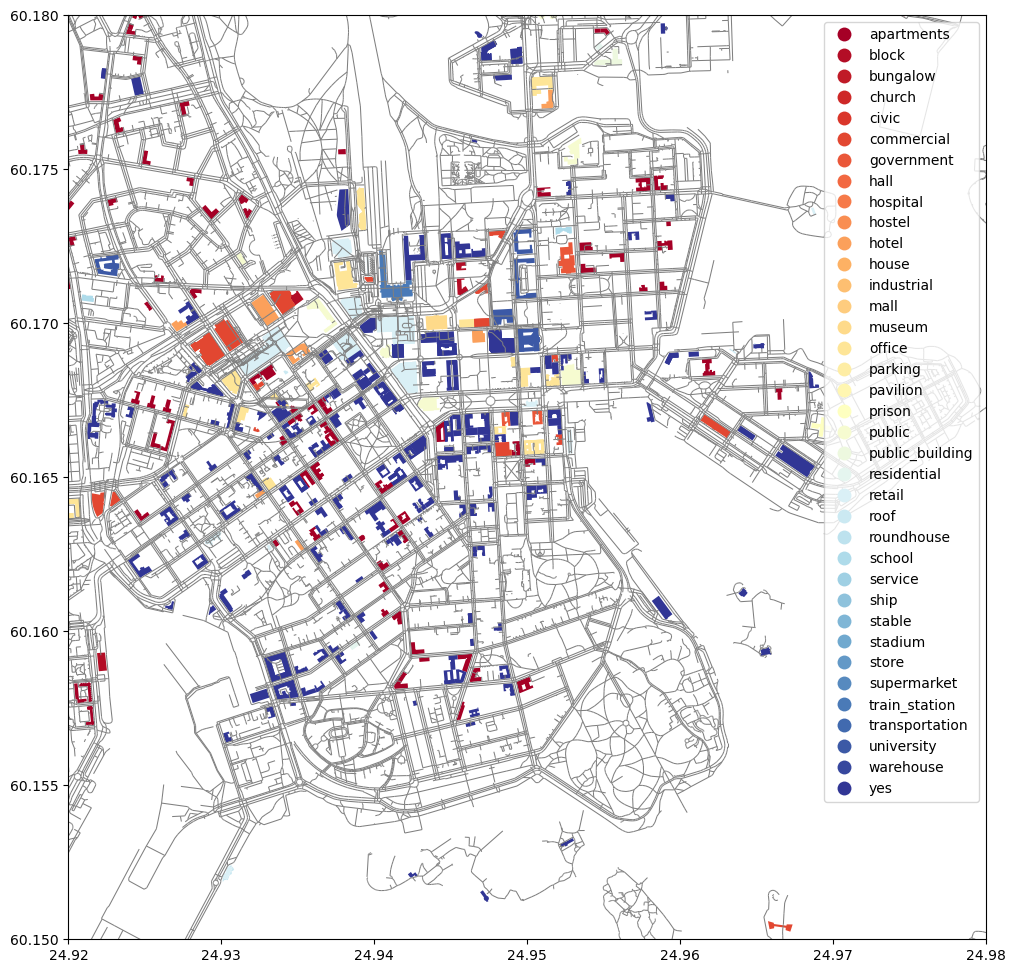

In [28]:
# Zoom into city center by specifying X and Y coordinate extent
# These values should be given in the units that our data is presented (here decimal degrees)
xmin, xmax = 24.92, 24.98
ymin, ymax = 60.15, 60.18

# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)

# Control and set the x and y limits for the axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

Perfect! Now it is much easier to understand our map because the roads brought much more context (assuming you know Helsinki). We ware able to add the roads to the same map by specifying the `ax` parameter to point to the axis that we received when first plotting the `join2` (i.e. selected buildings). In a similar manner, you can add as many layers in your map as you wish. Let's still do a small visual trick and specify that the background color in our map is black instead of white. This can be done easily by changing the `style` of matplotlib visualization renderer:

(60.15, 60.18)

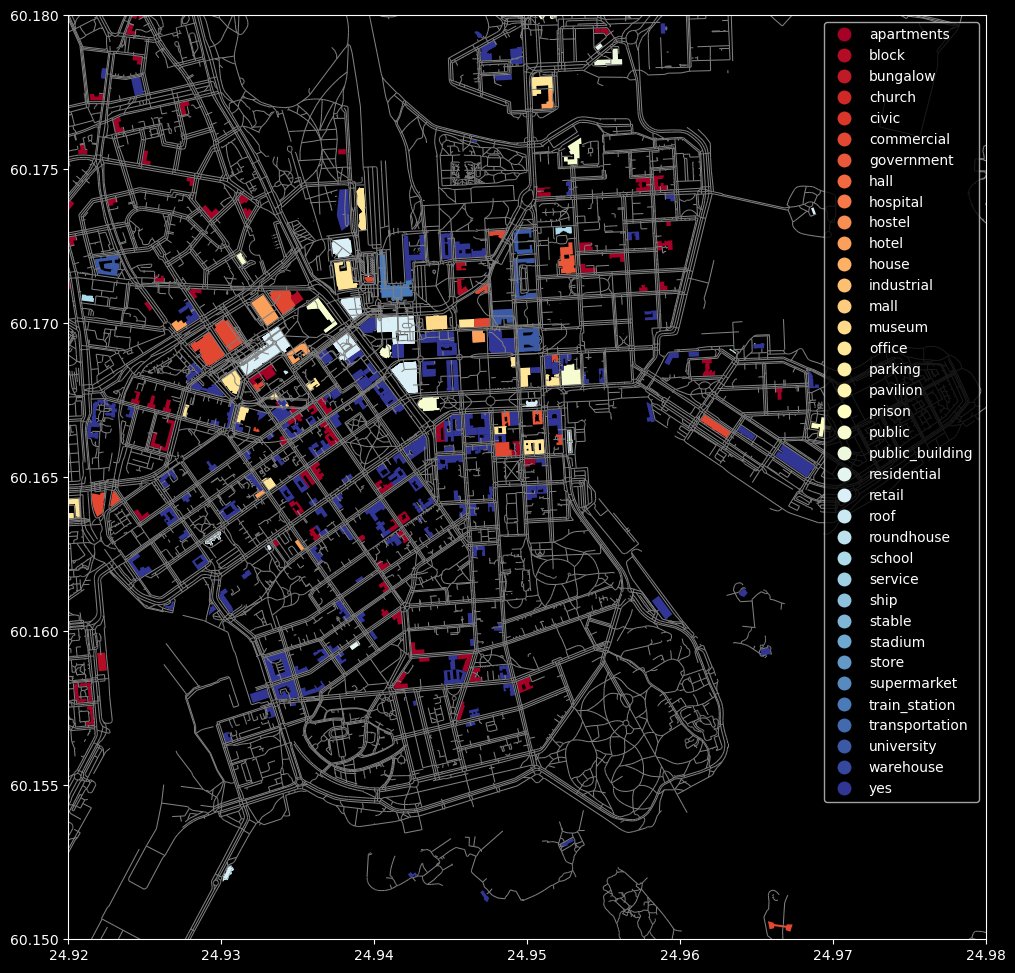

In [29]:
# Import matplotlib pyplot and use a dark_background theme
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Zoom into city center by specifying X and Y coordinate extent
# These values should be given in the units that our data is presented (here decimal degrees)
xmin, xmax = 24.92, 24.98
ymin, ymax = 60.15, 60.18

# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)

# Control and set the x and y limits for the axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

Awesome! Now we have a nice dark theme with our map. With this information you should be able to get going with Exercise 1. 

## Further information

For further information, we recommend checking the materials from [Automating GIS Processes](https://autogis.github.io/) -course (GIS things) and [Geo-Python](https://geo-python.github.io/) -course (intro to Python and data analysis with pandas). In addition, we always recommend to check the latest documentation from the websites of the libraries:

 - [geopandas](https://geopandas.org/) 
 - [pyrosm](https://pyrosm.readthedocs.io/en/latest/)
 - [matplotlib](https://matplotlib.org/)
 - [pandas](https://pandas.pydata.org/)